In [ ]:
import pandas as pd

/var/folders/v4/9hznb5s5563242xcz40z0xl40000gn/T/ipykernel_91883/1880452725.py:3: DtypeWarning: Columns (6,7,14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/bobbyantonio/repos/iecdt_environmental_data_analysis/data_samples/csv/Oxford-Radcliffe-daily-data-to-Dec-2023.csv')


In [ ]:
# 1)
df = pd.read_csv('/Users/bobbyantonio/repos/iecdt_environmental_data_analysis/data_samples/csv/Oxford-Radcliffe-daily-data-to-Dec-2023.csv')

In [2]:
df.head()

,YYYY,MM,DD,Tmax °C,Tmin °C,Daily Tmean °C,Daily range degC,Grass min °C,Air frost 0/1,Ground frost 0/1,...,Rainfall mm raw incl traces,Rainfall mm 1 dpl no traces,Rain day (0.2 mm or more),Wet day (1.0 mm or more),Sunshine duration h,Nil sunshine,12 h sunshine,Unnamed: 21,Unnamed: 22,Updated to Dec 2023 data
0,1815,1,1,6.6,-1.5,2.6,8.1,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rms@ouce.ox.ac.uk
1,1815,1,2,4.9,-3.2,0.9,8.1,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radcliffe Meteorological Observer
2,1815,1,3,2.6,-5.6,-1.5,8.2,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1815,1,4,2.1,-6.1,-2.0,8.2,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1815,1,5,1.0,-7.2,-3.1,8.2,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.columns

Index(['YYYY', 'MM', 'DD', 'Tmax °C', 'Tmin °C', 'Daily Tmean °C',
       'Daily range degC', 'Grass min °C', 'Air frost 0/1', 'Ground frost 0/1',
       'Max ≥ 25.0°C', 'Max ≥ 30.0°C', 'Min ≥ 15.0 °C', 'Max < 0 °C',
       'Rainfall mm raw incl traces', 'Rainfall mm 1 dpl no traces',
       'Rain day (0.2 mm or more)', 'Wet day (1.0 mm or more)',
       'Sunshine duration h', 'Nil sunshine', '12 h sunshine', 'Unnamed: 21',
       'Unnamed: 22', 'Updated to Dec 2023 data'],
      dtype='object')

In [ ]:
# 2)
df = df[['Date', 'Rainfall mm 1 dpl no traces', 'Daily Tmean °C']]

In [ ]:
#3)
df['Date'] = df['YYYY'].astype(str) + df['MM'].astype(str).str.zfill(2) + df['DD'].astype(str).str.zfill(2)
df = df.drop(['YYYY', 'MM', 'DD'], axis=1)
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
len(df[df['Rainfall mm 1 dpl no traces'].isna()])

4383

In [10]:
df['Daily Tmean K'] = df['Daily Tmean °C'] + 273.15
df.drop('Daily Tmean °C', axis=1, inplace=True)

In [14]:
df_mean_year = df.groupby('YYYY')['Daily Tmean K'].mean().reset_index()

<Axes: title={'center': 'Average Daily Temperature by Year'}, xlabel='Year', ylabel='Average Daily Tmean (K)'>

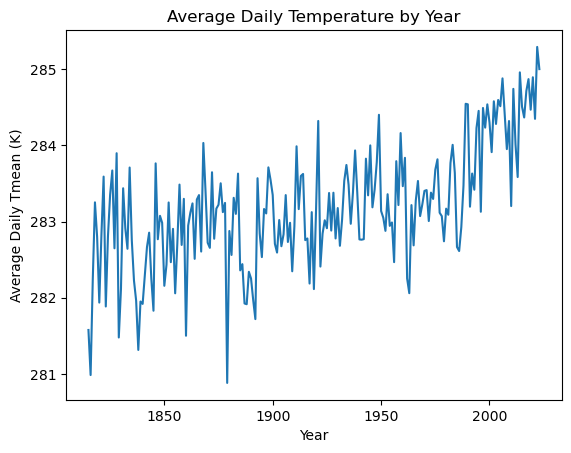

In [39]:
df_mean_year.plot.line(x='YYYY', y='Daily Tmean K', xlabel='Year', ylabel='Average Daily Tmean (K)', title='Average Daily Temperature by Year', legend=False)


<Axes: title={'center': 'Standard Deviation of Daily Temperature by Month'}, xlabel='Month', ylabel='Standard Deviation of Daily Tmean (K)'>

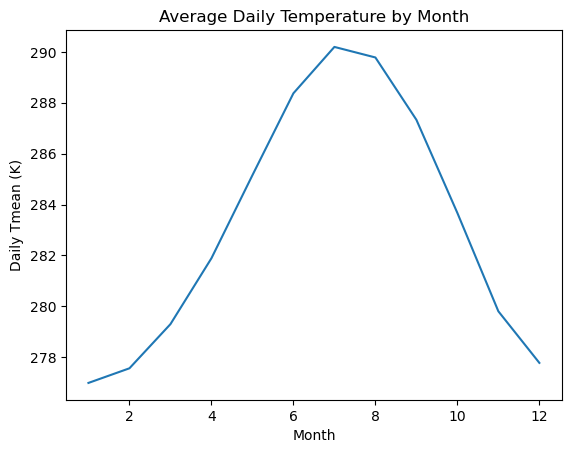

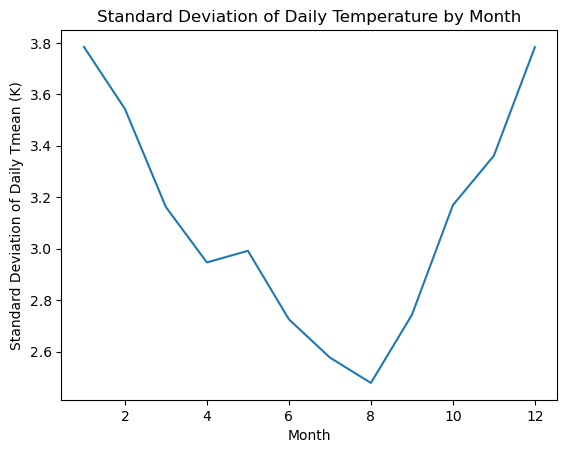

In [40]:
df_agg_month = df.groupby('MM')['Daily Tmean K'].agg(['mean', 'std']).reset_index()
df_agg_month.plot.line(x='MM', y='mean', xlabel='Month', ylabel='Daily Tmean (K)', title='Average Daily Temperature by Month', legend=False)
df_agg_month.plot.line(x='MM', y='std', xlabel='Month', ylabel='Standard Deviation of Daily Tmean (K)', title='Standard Deviation of Daily Temperature by Month', legend=False)

<Axes: title={'center': 'Histogram of Daily Mean Temperature in Kelvin'}, xlabel='Daily Tmean (K)', ylabel='Frequency'>

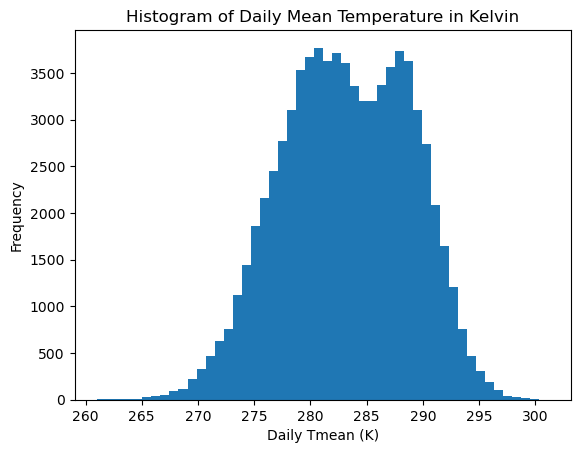

In [ ]:
df['Daily Tmean K'].plot.hist(bins=50, xlabel='Daily Tmean (K)', title='Histogram of Daily Mean Temperature (K)')

<Axes: title={'center': 'Histogram of Rainfall on Rainy Days'}, xlabel='Rainfall (mm)', ylabel='Frequency'>

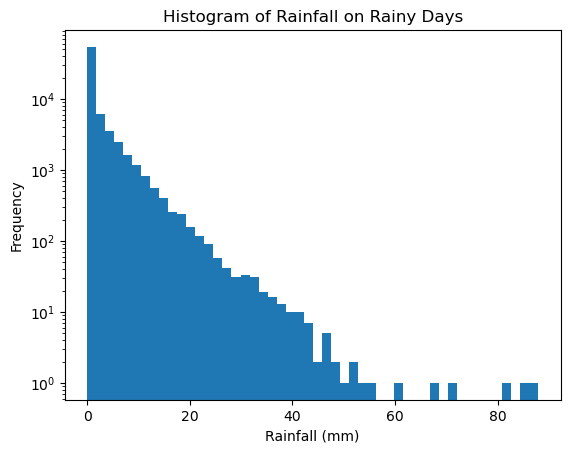

In [47]:
df_rainy = df[df['Rainfall mm 1 dpl no traces'].notna()]
df_rainy['Rainfall mm 1 dpl no traces'].plot.hist(bins=50, logy=True, xlabel='Rainfall (mm)', title='Histogram of Rainfall on Rainy Days')